In [1]:
import pandas as pd
import json
import networkx as nx
import nx_altair as nxa
import json
import squarify
import altair as alt
import numpy as np
import matplotlib
from sklearn.cluster import AgglomerativeClustering
from networkx.algorithms.community import *
from scipy.cluster.hierarchy import dendrogram,leaves_list
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

C:\Users\Danny\.conda\envs\NLP\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Danny\.conda\envs\NLP\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Danny\.conda\envs\NLP\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import networkx as nx
import nx_altair as nxa

# Generate a random graph
G = nx.fast_gnp_random_graph(n=20, p=0.25)

# Compute positions for viz.
pos = nx.spring_layout(G)

# Draw the graph using Altair
viz = nxa.draw_networkx(G, pos=pos)

# Show it as an interactive plot!
viz.interactive()

C:\Users\Danny\.conda\envs\NLP\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


alt.LayerChart(...)

In [3]:
import numpy as np

# Add weights to nodes and edges
for n in G.nodes():
    G.nodes[n]['weight'] = np.random.randn()

for e in G.edges():
    G.edges[e]['weight'] = np.random.uniform(1, 10)


# Draw the graph using Altair
viz = nxa.draw_networkx(
    G, pos=pos,
    node_color='weight',
    cmap='viridis',
    width='weight',
    edge_color='black',
)

# Show it as an interactive plot!
viz.interactive()

alt.LayerChart(...)

In [6]:
import numpy as np
import random

In [12]:
a = [random.randint(0,100) for x in range(100)]
b = [random.randint(0,100) for x in range(100)]

In [59]:
edge_df = pd.DataFrame([a,b]).transpose().rename(columns={0:"src", 1:"dst"})

In [41]:
g = nx.from_pandas_edgelist(df, source='src', target='dst', edge_attr=True)

In [53]:
node_df = pd.DataFrame()

In [57]:
node_df['node'] = [x for x in range(0,100)]

In [104]:
node_df['Category'] = [random.choice(["Banana", "Turtle", "Kayak", "Pancake", "Radar"]) for x in range(100)]

In [105]:
cat_dict = node_df.to_dict('dict')['Category']
cat_dict[100] = "Turtle"

In [107]:
for node in g.nodes():
#     print(node)
#     g.nodesnode['Category'] = cat_dict[node]
    g.nodes[node]['Category'] = cat_dict[node]

In [108]:
g.nodes[50]

{'Category': 'Pancake'}

In [111]:
import matplotlib.pyplot as plt
# create number for each group to allow use of colormap
from itertools import count

In [113]:
groups = set(nx.get_node_attributes(g,'Category').values())
mapping = dict(zip(sorted(groups),count()))
colors = [mapping[g.nodes[n]['Category']] for n in g.nodes()]

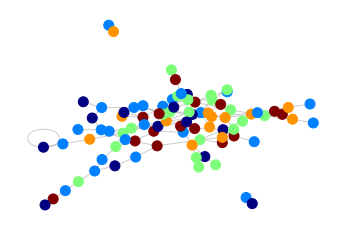

In [117]:
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(g, pos, nodelist=g.nodes(), node_color=colors, 
                            node_size=100, cmap=plt.cm.jet)
# plt.colorbar(nc)
plt.axis('off')
plt.show()

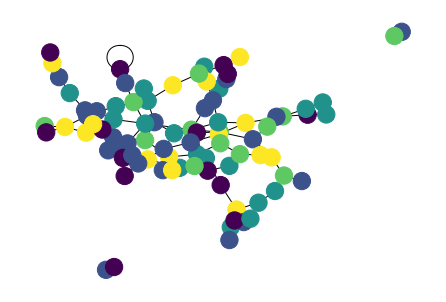

In [119]:
nx.draw(g, node_color=colors)

In [120]:
e = nxa.draw_networkx_edges(g, pos=pos)  # get the edge layer
n = nxa.draw_networkx_nodes(g, pos=pos)  # get the node layer 

C:\Users\Danny\.conda\envs\NLP\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [132]:
n = n.mark_circle().encode(
    color=alt.Color('Category:N', legend=None),
    size=alt.Size('Category', scale=alt.Scale(range=[10, 1500])),
#     size=alt.Size('appearance', scale=alt.Scale(range=[10, 1500])),
    opacity=alt.OpacityValue(1),
## Tooltip
#     tooltip=['label']
        )

e = e.mark_line().encode(
#     size=alt.Size('weight'),
#     size=alt.Size('weight', scale=alt.Scale(domain=[0, 50000])),
    color = alt.Color('Category', legend=None)
)

(e+n).properties(
    width=500,height=500
)

ValueError: label encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.LayerChart(...)

In [4]:
e = nxa.draw_networkx_edges(season6, pos=pos)  # get the edge layer
n = nxa.draw_networkx_nodes(season6, pos=pos)  # get the node layer 

# modify the code to change the encodings
n = n.mark_circle().encode(
    color=alt.Color('community:N', legend=None),
    size=alt.Size('appearance', scale=alt.Scale(range=[10, 1500])),
#     size=alt.Size('appearance', scale=alt.Scale(range=[10, 1500])),
    opacity=alt.OpacityValue(1),
## Tooltip
    tooltip=['label']
        )

e = e.mark_line().encode(
#     size=alt.Size('weight'),
#     size=alt.Size('weight', scale=alt.Scale(domain=[0, 50000])),
    color = alt.Color('weight', legend=None)
)

(e+n).properties(
    width=500,height=500
)

NameError: name 'season6' is not defined